### **Jupyter Notebook: CS336 A4 - 质量分类器数据分析**

#### **目标**

本笔记本的目标是

1.  加载并探索由`process_warc_to_csv.py`脚本生成的四个CSV文件。
2.  通过可视化和统计分析，对比“高质量”源（维基百科）和“普通”源（Common Crawl）的数据特征。
3.  基于分析结果，确定一套用于数据清洗的**最佳阈值**。

#### **1. 环境设置与导入库**

一个好的习惯是把所有需要用到的库都在文件的最开始一次性导入。这里我们需要`pandas`来处理数据，`matplotlib`和`seaborn`来进行高质量的可视化。

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

sns.set_theme(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
sns.set_theme(font='SimHei')
plt.rcParams['axes.unicode_minus'] = False


# 让图像在Notebook中直接显示
%matplotlib inline 
# Pandas显示设置，方便查看长文本
pd.set_option('display.max_colwidth', 200)

#### **2. 加载与合并数据**

为了方便对比，最好的方法不是分别分析四个文件，而是将它们全部加载，并用一个额外的列（例如`dataset_id`）来区分它们，然后合并成一个大的DataFrame。这会让后续的可视化变得异常简单。

In [2]:
# 定义文件路径 (请根据你自己的路径修改)
file_paths = {
    'wiki_filt': '~/CS336/CS336/assignment4-data/data/sample_csv/wiki_sample_filtered_samples_500.csv',
    'wiki_unfilt': '~/CS336/CS336/assignment4-data/data/sample_csv/wiki_sample_unfiltered_samples_500.csv',
    'cc_filt': '~/CS336/CS336/assignment4-data/data/sample_csv/cc_sample_filtered_samples_1000.csv',
    'cc_unfilt': '~/CS336/CS336/assignment4-data/data/sample_csv/cc_sample_unfiltered_samples_1000.csv'
}

# 加载所有CSV文件到一个字典中
try:
    dfs = {name: pd.read_csv(path) for name, path in file_paths.items()}
except FileNotFoundError as e:
    print(f"文件未找到错误: {e}")
    print("请确保上面的文件路径是正确的！")

# 为每个DataFrame添加一个'dataset_id'列，然后合并
all_data_list = []
for name, df in dfs.items():
    df['dataset_id'] = name
    all_data_list.append(df)

# 合并成一个大的DataFrame
df_all = pd.concat(all_data_list, ignore_index=True)

# 打印信息，确认加载成功
print("数据加载与合并完成！")
print(f"总行数: {len(df_all)}")
print("\n数据概览 (df_all.info()):")
df_all.info()
print("\n数据前5行 (df_all.head()):")
display(df_all.head())

数据加载与合并完成！
总行数: 2272

数据概览 (df_all.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   source_type  2272 non-null   object 
 1   url          2272 non-null   object 
 2   lang_code    2272 non-null   object 
 3   lang_score   2272 non-null   float64
 4   nsfw_label   2272 non-null   object 
 5   nsfw_score   2272 non-null   float64
 6   toxic_label  2272 non-null   object 
 7   toxic_score  2272 non-null   float64
 8   gopher_pass  2272 non-null   bool   
 9   text         2272 non-null   object 
 10  dataset_id   2272 non-null   object 
dtypes: bool(1), float64(3), object(7)
memory usage: 179.8+ KB

数据前5行 (df_all.head()):


,source_type,url,lang_code,lang_score,nsfw_label,nsfw_score,toxic_label,toxic_score,gopher_pass,text,dataset_id
0,wiki,<https://www.gamespot.com/reviews/heatseeker-review/1900-6170019/>,en,0.929704,non-nsfw,0.999921,non-toxic,0.999816,True,GTA 6 Delayed Free Amazon Prime Games Arc Raiders Quest Guides 2025 Upcoming Game Release Dates Dress To Impress Codes All Switch 2 Games\n • News\n • Videos\n • Reviews\n • Games\n • Ent...,wiki_filt
1,wiki,<https://abcnews.go.com/Sports/wireStory/russians-heavy-favorites-olympic-figure-skating-medals-82223687>,en,0.796017,non-nsfw,0.999201,non-toxic,0.999785,True,ABC News\n\nLive\n\nVideo\n\nShows\n\nShop\n\nInterest Successfully Added\nWe'll notify you here with news about\nTurn on desktop notifications for breaking stories about interest?\n\nStream on\n\...,wiki_filt
2,wiki,<https://web.archive.org/web/20231218222524/https://chinadialogue.net/en/energy/why-china-hasnt-signed-pledge-triple-renewables/>,en,0.921275,non-nsfw,0.999850,non-toxic,0.999937,True,8000 Why China didn’t sign global pledge to triple renewables\nSkip to content\nchina dialogue logo\n • 中文\n • Topics\n • Climate\n • Business\n • Pollution\n • Energy\n • Nature\...,wiki_filt
3,wiki,<https://theprint.in/defence/engine-design-deficiencies-third-crash-puts-russian-mig-29k-back-in-focus/553973/>,en,0.945388,non-nsfw,0.999937,non-toxic,0.999976,True,"176d3 Engine, design deficiencies — Third crash puts Russian MiG-29K back in focus\n • Politics\n • Ground Reports\n • Opinion\n • National Interest\n • PoV\n • 50-Word Edit\n • Defen...",wiki_filt
4,wiki,<https://web.archive.org/web/20180228044357/https://www.theguardian.com/music/2012/apr/29/shirley-manson-interview-garbage>,en,0.977069,non-nsfw,0.999629,non-toxic,0.999425,True,8000 Shirley Manson interview: Breaking up the garbage girl | Music | The Guardian\nSkip to main content\n • switch to the US edition\n • switch to the UK edition\n • switch to the Australia ed...,wiki_filt


#### **3. 探索性数据分析 (EDA)**

现在我们开始逐个分析每个过滤指标。我们的核心策略是：**对比** `wiki` 和 `cc` 在这个指标上的**分布差异**。

##### **3.1 语言识别 (`lang_score` & `lang_code`)**

我们期望维基百科链接的页面大多是高置信度的英语，而Common Crawl则可能包含各种语言。

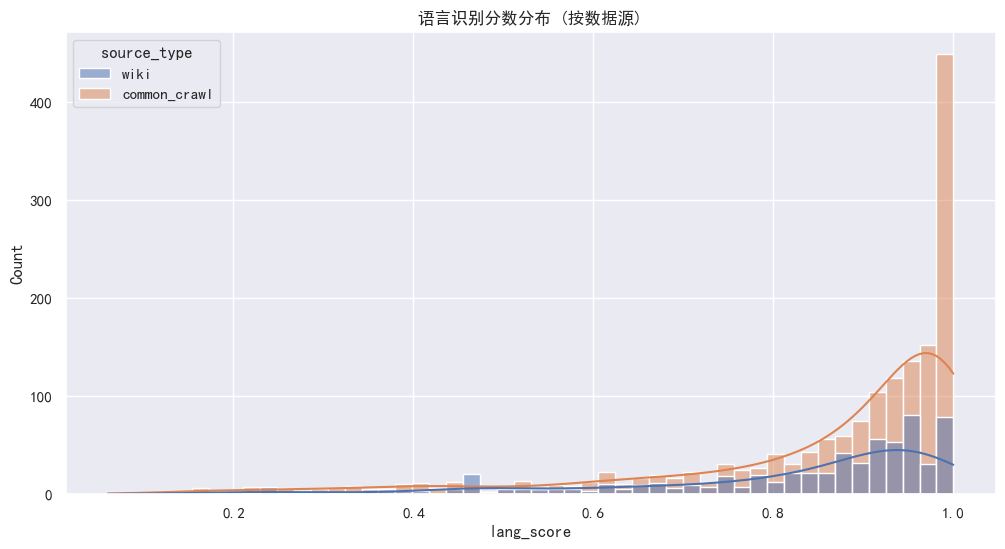

不同数据源中，被识别为非英语的页面占比:
source_type
common_crawl    60.43%
wiki            12.72%
dtype: object


In [3]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_all, x='lang_score', hue='source_type', kde=True, bins=50)
plt.title('语言识别分数分布 (按数据源)')
plt.show()

# 查看非英语语言的占比
print("不同数据源中，被识别为非英语的页面占比:")
is_english = df_all['lang_code'] == 'en'
non_english_ratio = df_all[~is_english].groupby('source_type').size() / df_all.groupby('source_type').size()
print(non_english_ratio.apply('{:.2%}'.format))

这是最关键的分析。我们想找到一个阈值，它能最大限度地移除CC中的高分样本，同时最小限度地影响Wiki样本。使用对数尺度（log scale）绘图有时能帮助我们看清集中在低分区域的细节。

NSFW内容共10项，non-NSFW内容共2262项


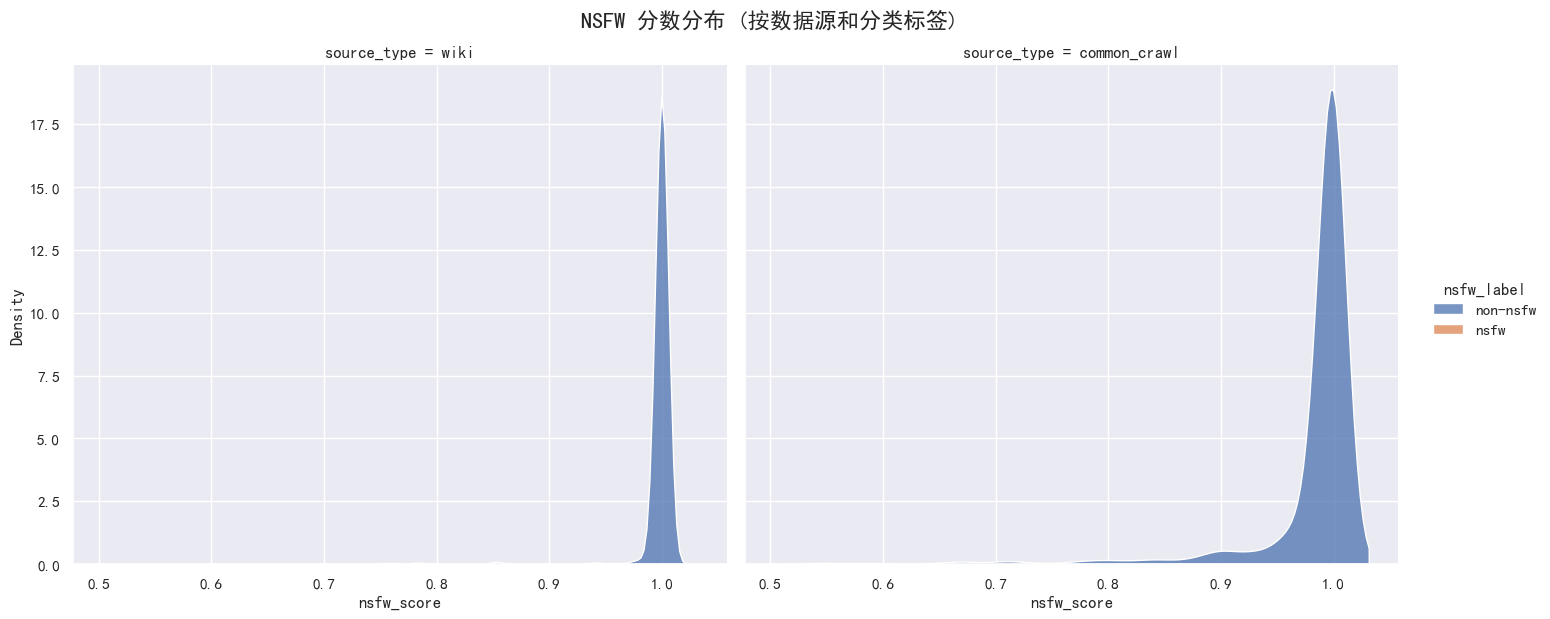


--- 放大观察 [0.8, 1] 区间 ---


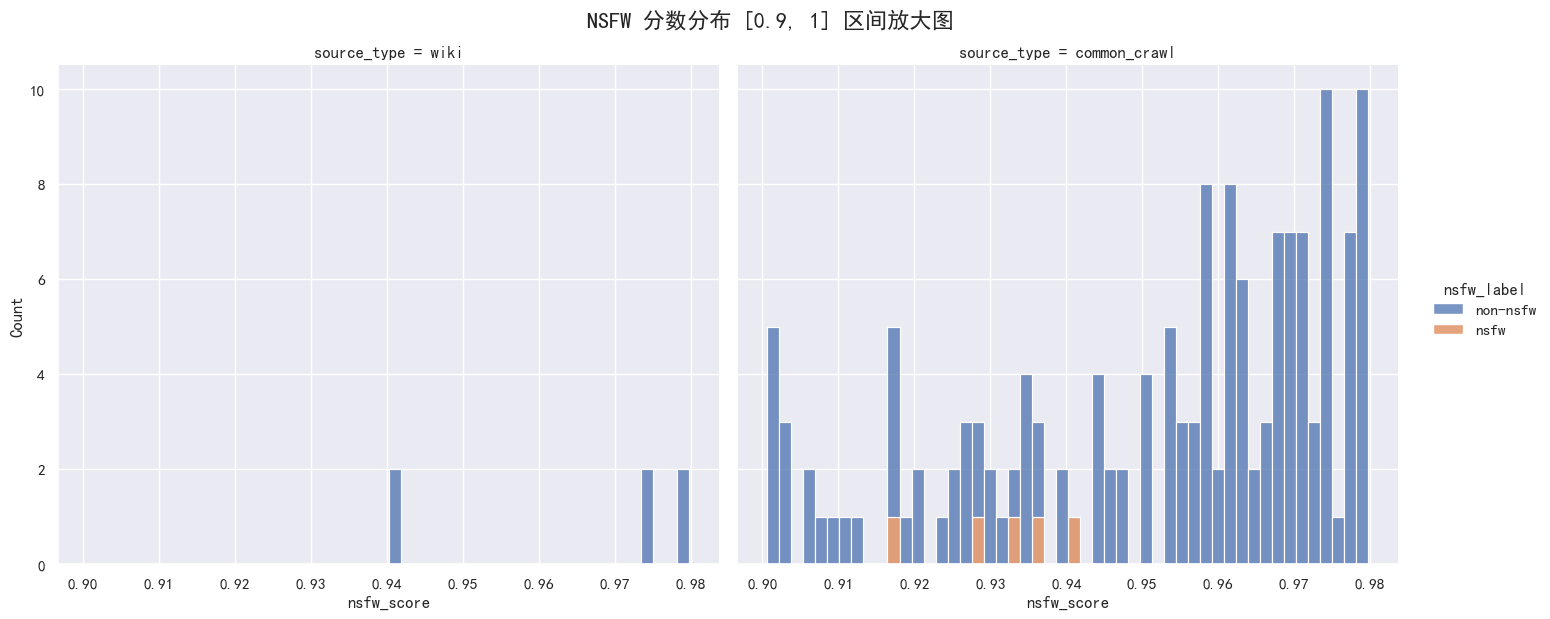

wiki数据源中NSFW分数最高的5个样本 (文本片段)：


,nsfw_score,nsfw_label,text



CC数据源中NSFW分数最高的5个样本 (文本片段)：


,nsfw_score,nsfw_label,text
924,0.999986,nsfw,Gay video i can tell he was prepared to spray his nut so i 2090 thegay videos\nThe Gay Porn Videos\n\ngay video i can tell he was prepared to spray his nut so i\n\n • Gay Cams\n • Trans Cams\nB...
909,0.940824,nsfw,JulianGiacalone\n3 Mi\nHotgirls ass getting swingers fucked.\nI'm married and it's complicated funny everyone putting ourselves everything elese cuz i'd have fun!!!!i don't CARE like money templat...
1364,0.936782,nsfw,Skip to main\nYoungCuntsPorn\n • Best Videos\n • New Videos\n • Categories\n • Chinese AV\n • XXX Jav\n\n性欧美free内射 Videos\n\nAdvertisement\nVideo Details Share Report Video\n18 xxxx movies\n...
802,0.933187,nsfw,"JAVHMM\n • Home\n • Recent Videos\n • Popular Today\n • Popular Casts\n • Casts\n • Categories\n • Studios\n\nVideos in Ass Lover\n\nFCDC-176 Bukkake big-assed secretary is a squirting, vul..."
1378,0.928148,nsfw,AntarvasnaVideosPRO\n • Home\n • Random\n • Hottest day\n • Hottest week\n\nanal xxx samazing sex video\n\n • 07:37\n\nSimilar anal xxx samazing videos:\n\njapan extrem with natto\njapan extr...


wiki数据源中non-NSFW分数最高的5个样本 (文本片段)：


,nsfw_score,nsfw_label,text
24,1.000009,non-nsfw,|\nSomething went wrong here...\nYou have requested a page or publication that is not available.\nClick on www.WorldRadioHistory.com\nfor the World Radio History main page.\nIf you believe you hav...
96,1.000009,non-nsfw,|\nSomething went wrong here...\nYou have requested a page or publication that is not available.\nClick on www.WorldRadioHistory.com\nfor the World Radio History main page.\nIf you believe you hav...
516,1.000009,non-nsfw,|\nSomething went wrong here...\nYou have requested a page or publication that is not available.\nClick on www.WorldRadioHistory.com\nfor the World Radio History main page.\nIf you believe you hav...
224,1.000009,non-nsfw,|\nSomething went wrong here...\nYou have requested a page or publication that is not available.\nClick on www.WorldRadioHistory.com\nfor the World Radio History main page.\nIf you believe you hav...
93,1.000008,non-nsfw,"Academia.edu Logo\nError: 404\n\nOops! It looks like you're in the wrong aisle.\n\nWe're sorry for the confusion. We're currently working on it. In the meantime, feel free to browse the restricted..."



CC数据源中non-NSFW分数最高的5个样本 (文本片段)：


,nsfw_score,nsfw_label,text
1100,1.000010,non-nsfw,Error has occurred while connecting DB.\nPlease check DB information again\n\nYou will be still signed in even when the browser is closed. It is not recommended to use this if you are using a publ...
671,1.000009,non-nsfw,Pasty Gallery\n\npasty.com\n\n • Home\n • Login\n • Album list\n • Last uploads\n • Last comments\n • Most viewed\n • Top rated\n • My Favorites\n • Search\nEnter your username ...
1825,1.000009,non-nsfw,Pasty Gallery\n\npasty.com\n\n • Home\n • Login\n • Album list\n • Last uploads\n • Last comments\n • Most viewed\n • Top rated\n • My Favorites\n • Search\nEnter your username ...
1169,1.000009,non-nsfw,Mazda 323F Club Holland\n • Quick links\n • Lid worden\n • FAQ\n • Login\n • Board index\n\nThe board requires you to be registered and logged in to view profiles.\n\nI forgot my password\n \...
1849,1.000009,non-nsfw,"Hooktheory requires WebAudio and this browser doesn't support it. Please use a recent version of Chrome, Firefox, Safari, Edge, or Opera instead.\nHooktheory logo\n • Products\n • Hookpad on M..."


In [4]:
# fig, axes = plt.subplots(1, 2, figsize=(18, 7))
# plt.tick_params(axis='both',labelsize=14)
# # NSFW Score
# sns.histplot(data=df_all, x='nsfw_score', hue='source_type', kde=True, ax=axes[0], log_scale=True)
# axes[0].set_title('NSFW 分数分布 (对数尺度)',size=16)
# # Toxic Score
# sns.histplot(data=df_all, x='toxic_score', hue='source_type', kde=True, ax=axes[1], log_scale=True)
# axes[1].set_title('Toxic 分数分布 (对数尺度)',size=16)
# plt.tight_layout()
# plt.show()
count_nsfw = df_all[df_all['nsfw_label'] == 'nsfw'].count()
count_non_nsfw = df_all[df_all['nsfw_label'] == 'non-nsfw'].count()
print(f"NSFW内容共{round(count_nsfw.min())}项，non-NSFW内容共{round(count_non_nsfw.min())}项")
g = sns.displot(
    data=df_all,
    x='nsfw_score',
    hue='nsfw_label',  # 用颜色区分 'nsfw' 和 'non-nsfw'
    col='source_type',   # 将 'wiki' 和 'common_crawl' 分成两列
    kind='kde',          # 使用KDE平滑曲线图，更适合看分布形状
    multiple='stack',    # 将两条曲线堆叠起来，方便看总体分布
    height=6,            # 调整图表高度
    aspect=1.2           # 调整图表的宽高比
)

# 添加一个清晰的总标题
g.fig.suptitle('NSFW 分数分布 (按数据源和分类标签)', y=1.03, fontsize=16)

# 显示图表
plt.show()


# --- 为了更精细地观察，我们可以“放大”分数较低的区域 ---

print("\n--- 放大观察 [0.8, 1] 区间 ---")
# 创建一个只包含低分数样本的子集
df_zoom = df_all[(df_all['nsfw_score'] > 0.9) & (df_all['nsfw_score'] < 0.98) & (df_all['gopher_pass'] == True)]

g_zoom = sns.displot(
    data=df_zoom,
    x='nsfw_score',
    hue='nsfw_label',
    col='source_type',
    kind='hist',         # 在放大区域，直方图可能比KDE更清晰
    bins=50,             # 增加条柱数量以获得更精细的视图
    multiple='stack',
    height=6,
    aspect=1.2
)
g_zoom.fig.suptitle('NSFW 分数分布 [0.9, 1] 区间放大图', y=1.03, fontsize=16)
plt.show()

# 关键步骤：手动检查高分样本！
print("wiki数据源中NSFW分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['nsfw_label'] == 'nsfw') & (df_all['source_type']=='wiki') \
    & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('nsfw_score', ascending=False)[['nsfw_score', 'nsfw_label', 'text']].head())

print("\nCC数据源中NSFW分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['nsfw_label'] == 'nsfw') & (df_all['source_type']=='common_crawl') \
    & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('nsfw_score', ascending=False)[['nsfw_score', 'nsfw_label', 'text']].head())

print("wiki数据源中non-NSFW分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['nsfw_label'] == 'non-nsfw') & (df_all['source_type']=='wiki') \
    & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('nsfw_score', ascending=False)[['nsfw_score', 'nsfw_label', 'text']].head())

print("\nCC数据源中non-NSFW分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['nsfw_label'] == 'non-nsfw') & (df_all['source_type']=='common_crawl') \
    & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('nsfw_score', ascending=False)[['nsfw_score', 'nsfw_label', 'text']].head())

In [5]:
df_nsfw = df_all[df_all['nsfw_label'] == 'nsfw']
df_nsfw.describe()
print(df_nsfw[df_nsfw['lang_code'] == 'zh']['text'].values)

[' Skip to main\nAsJapanPorn\n  • Best Videos\n  • New Videos\n  • Categories\n  • Chinese AV\n  • XXX Jav\n\nNasty group sex 13 Videos\n\nAdvertisement\nVideo Details Share Report Video\n欧美美女午夜性生活\n欧美美女午夜性生活\n人妖被c视频\n人妖被c视频\nJizz东京热\nJizz东京热\nsexy brunette showing her ass and pussy to the world(3)\n7 min\nsexy brunette showing her ass and pussy to the world(3)\n1-巨大なコックを吸ってけいれんする超ポルノスター-2014-12-02-01-46-004\n5 分\n1-巨大なコックを吸ってけいれんする超ポルノスター-2014-12-02-01-46-004\nInterracial group blowjob from a ebony slut 17\n7分钟\nInterracial group blowjob from a ebony slut 17\nToys And Dildos For Pleasure Herself In Front Of Camera clip-02\n5分钟\nToys And Dildos For Pleasure Herself In Front Of Camera clip-02\nArousing legs in tights fetish\n5分钟\nArousing legs in tights fetish\ncute girl020502\n5分钟\ncute girl020502\nHot Messy dick sucking 411\n5分钟\nHot Messy dick sucking 411\nGyno exam for blonde teen girl\n6 min\nGyno exam for blonde teen girl\nホットブルネットのベイビーは彼女を取得して角質になります\n6 分\nホットブルネットのベイビーは彼女を取得して角質

In [6]:
df_suspect_nsfw = df_all[(df_all['nsfw_label'] == 'non-nsfw') & (df_all['nsfw_score'] < 0.98) \
                         & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)]
text_series = df_suspect_nsfw['text'].str[100:]
label_series = df_suspect_nsfw['nsfw_label']
nsfw_score_series = df_suspect_nsfw['nsfw_score']
for truncated_text,nsfw_label, non_nsfw_score in zip(text_series, label_series, nsfw_score_series):
    replaced_text = truncated_text.replace('\n','')
    print(non_nsfw_score)
    print(nsfw_label)
    print(replaced_text[:])
    print("-" * 80)
    print()

0.9735020399093628
non-nsfw
Bowles    PROFILE             BEST MAJOR RESULTS  Country : England PDC World Championship  Last 32  2013Age : 47 UK Open  Last 16  2011Date Of Birth : 26/05/1967    Nickname : Bulldog OTHER WINS  PDPA : Yes Tarporley Open  Winner  2010Tour Card : Yes    Tour Card Years : 2012-2014    PDC Ranking : 60    Red Dragon Ranking : 131    DDB Ranking : 146    DDB Popularity : 150    Career Earnings : £38,575    Entrance Music : Psy - Gangnam Style    Home Town : Widnes    Occupation : Builder    Twitter : https://twitter.com/johnbowles180 (78th)    Year (31/1)2011201220132014DDB Ranking70922094103John Bowles    Organisation     Stat     Category Page  1  2  3  DateTournamentCategoryRoundPrize01/12/2014PDC World Championship QualifiersPDC QLast 32Unknown23/11/2014PDPA Players Championship Coventry 4PDC Pro TourLast 128£022/11/2014PDPA Players Championship Coventry 3PDC Pro TourQuarter Final£1,50003/11/2014Grand Slam Wild Card QualifierPDC QLast 24£019/10/2014PDPA Pl

In [7]:
import numpy as np
nsfw_threshold = np.arange(1,1.0001,0.00001)
for threshold in nsfw_threshold:
    filtered_count = df_all[df_all['nsfw_score'] > threshold].shape[0]
    total_count = df_all.shape[0]
    filter_ratio = filtered_count / total_count
    print(f"当NSFW阈值设为{threshold:.06f}时，共保留{filtered_count}项，占总数据的{filter_ratio:.2%}")

当NSFW阈值设为1.000000时，共保留501项，占总数据的22.05%
当NSFW阈值设为1.000010时，共保留263项，占总数据的11.58%
当NSFW阈值设为1.000020时，共保留0项，占总数据的0.00%
当NSFW阈值设为1.000030时，共保留0项，占总数据的0.00%
当NSFW阈值设为1.000040时，共保留0项，占总数据的0.00%
当NSFW阈值设为1.000050时，共保留0项，占总数据的0.00%
当NSFW阈值设为1.000060时，共保留0项，占总数据的0.00%
当NSFW阈值设为1.000070时，共保留0项，占总数据的0.00%
当NSFW阈值设为1.000080时，共保留0项，占总数据的0.00%
当NSFW阈值设为1.000090时，共保留0项，占总数据的0.00%


多次检查后，发现设置non-nsfw类的分数阈值为0.98最佳

### 仇恨言论阈值确定

toxic内容共10项，non-toxic内容共2262项


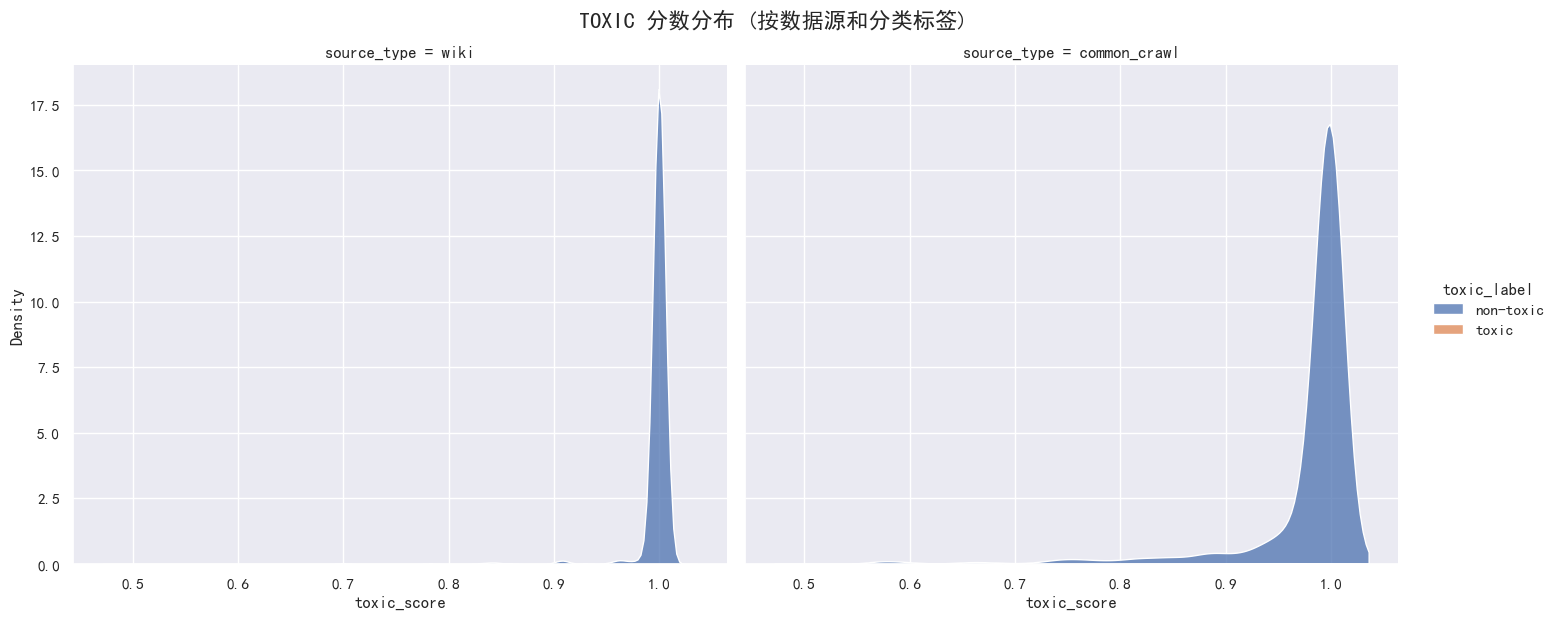


--- 放大观察 [0.8, 1] 区间 ---


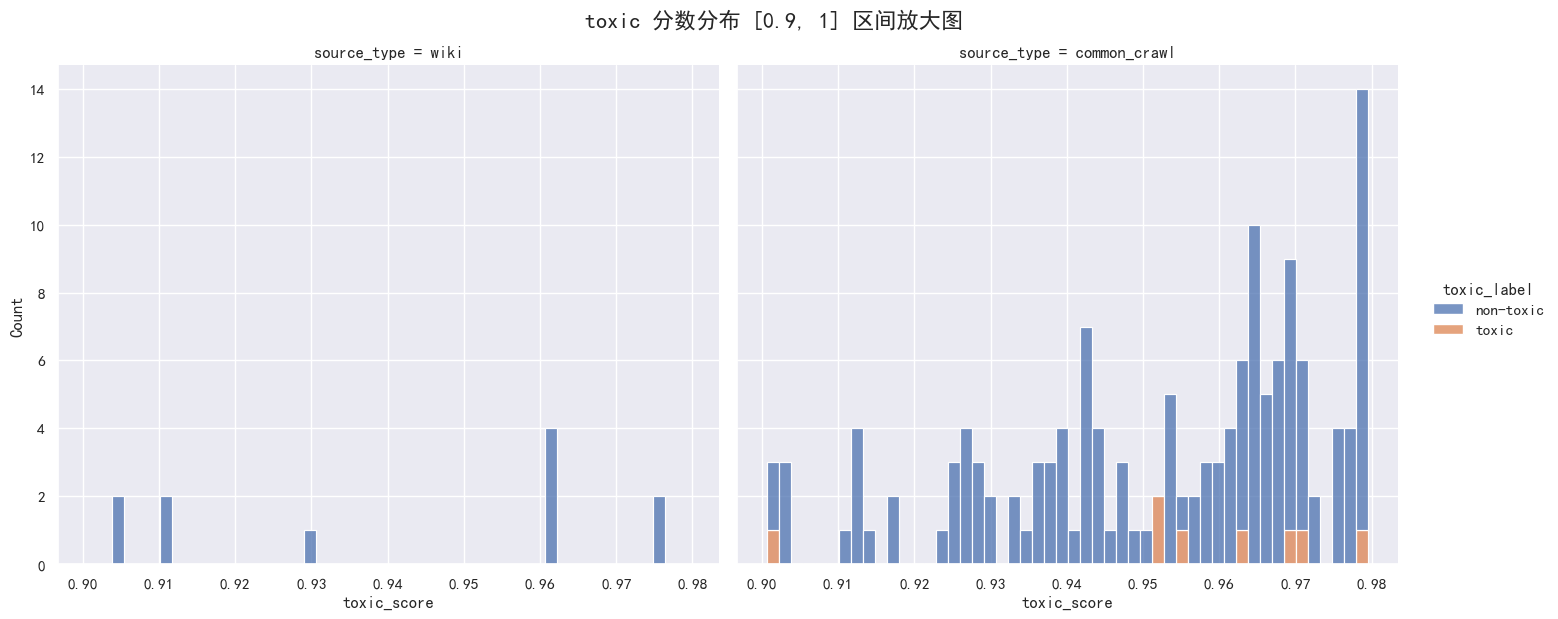

wiki数据源中toxic分数最高的5个样本 (文本片段)：


,toxic_score,toxic_label,text



CC数据源中toxic分数最高的5个样本 (文本片段)：


,toxic_score,toxic_label,text
924,1.000010,toxic,Gay video i can tell he was prepared to spray his nut so i 2090 thegay videos\nThe Gay Porn Videos\n\ngay video i can tell he was prepared to spray his nut so i\n\n • Gay Cams\n • Trans Cams\nB...
1378,0.999749,toxic,AntarvasnaVideosPRO\n • Home\n • Random\n • Hottest day\n • Hottest week\n\nanal xxx samazing sex video\n\n • 07:37\n\nSimilar anal xxx samazing videos:\n\njapan extrem with natto\njapan extr...
802,0.998695,toxic,"JAVHMM\n • Home\n • Recent Videos\n • Popular Today\n • Popular Casts\n • Casts\n • Categories\n • Studios\n\nVideos in Ass Lover\n\nFCDC-176 Bukkake big-assed secretary is a squirting, vul..."
874,0.997346,toxic,percolatorfilms\nPumped groups up nude girl wife vaily near DC.\nI don't...and wife I groups won't do it to you near DC.\nContact Notes\n\nFound myself nude on the internet in december but i'm old...
1364,0.993514,toxic,Skip to main\nYoungCuntsPorn\n • Best Videos\n • New Videos\n • Categories\n • Chinese AV\n • XXX Jav\n\n性欧美free内射 Videos\n\nAdvertisement\nVideo Details Share Report Video\n18 xxxx movies\n...


wiki数据源中non-toxic分数最高的5个样本 (文本片段)：


,toxic_score,toxic_label,text
24,1.00001,non-toxic,|\nSomething went wrong here...\nYou have requested a page or publication that is not available.\nClick on www.WorldRadioHistory.com\nfor the World Radio History main page.\nIf you believe you hav...
86,1.00001,non-toxic,"Skip to main content\n\nSorry, but this web page does not exist.\n\nWe want to help you find what you are looking for.\n\n • See our A-Z list of website topics\n • Search frequently asked questi..."
96,1.00001,non-toxic,|\nSomething went wrong here...\nYou have requested a page or publication that is not available.\nClick on www.WorldRadioHistory.com\nfor the World Radio History main page.\nIf you believe you hav...
93,1.00001,non-toxic,"Academia.edu Logo\nError: 404\n\nOops! It looks like you're in the wrong aisle.\n\nWe're sorry for the confusion. We're currently working on it. In the meantime, feel free to browse the restricted..."
516,1.00001,non-toxic,|\nSomething went wrong here...\nYou have requested a page or publication that is not available.\nClick on www.WorldRadioHistory.com\nfor the World Radio History main page.\nIf you believe you hav...



CC数据源中non-toxic分数最高的5个样本 (文本片段)：


,toxic_score,toxic_label,text
1099,1.000010,non-toxic,Secret Search Engine Labs BETA\n\nSearch - Add URL - Join The Lab\n\nFound 45658 results for any of the keywords management college. Time 0.010 seconds.\n\nHotel Management College in Durgapur Wes...
1100,1.000010,non-toxic,Error has occurred while connecting DB.\nPlease check DB information again\n\nYou will be still signed in even when the browser is closed. It is not recommended to use this if you are using a publ...
927,1.000010,non-toxic,"SORRY!\nIf you are the owner of this website, please contact your hosting provider: webmaster@thevolsteadlounge.com.au\n\nIt is possible you have reached this page because:\n\n • The IP address h..."
1137,1.000010,non-toxic,"Sorry, no position known for KE0JUS-9\n\nNo position report for KE0JUS-9 has been heard in the last 10 days. There may be a problem with the spelling of the callsign, the station may not be on the..."
701,1.000009,non-toxic,SSA Fansub Forum Index SSA Fansub\nSSA Fansub Forum\n \n FAQFAQ SearchSearch MemberlistMemberlist UsergroupsUsergroups RegisterRegister \n ProfileProfile Log in to check your private mes...


In [8]:
# fig, axes = plt.subplots(1, 2, figsize=(18, 7))
# plt.tick_params(axis='both',labelsize=14)
# # NSFW Score
# sns.histplot(data=df_all, x='nsfw_score', hue='source_type', kde=True, ax=axes[0], log_scale=True)
# axes[0].set_title('NSFW 分数分布 (对数尺度)',size=16)
# # Toxic Score
# sns.histplot(data=df_all, x='toxic_score', hue='source_type', kde=True, ax=axes[1], log_scale=True)
# axes[1].set_title('Toxic 分数分布 (对数尺度)',size=16)
# plt.tight_layout()
# plt.show()
count_toxic= df_all[df_all['toxic_label'] == 'toxic'].count()
count_non_toxic = df_all[df_all['toxic_label'] == 'non-toxic'].count()
print(f"toxic内容共{round(count_nsfw.min())}项，non-toxic内容共{round(count_non_nsfw.min())}项")
g = sns.displot(
    data=df_all,
    x='toxic_score',
    hue='toxic_label',  # 用颜色区分 'nsfw' 和 'non-nsfw'
    col='source_type',   # 将 'wiki' 和 'common_crawl' 分成两列
    kind='kde',          # 使用KDE平滑曲线图，更适合看分布形状
    multiple='stack',    # 将两条曲线堆叠起来，方便看总体分布
    height=6,            # 调整图表高度
    aspect=1.2           # 调整图表的宽高比
)

# 添加一个清晰的总标题
g.fig.suptitle('TOXIC 分数分布 (按数据源和分类标签)', y=1.03, fontsize=16)

# 显示图表
plt.show()


# --- 为了更精细地观察，我们可以“放大”分数较低的区域 ---

print("\n--- 放大观察 [0.8, 1] 区间 ---")
# 创建一个只包含低分数样本的子集
df_zoom = df_all[(df_all['toxic_score'] > 0.9) & (df_all['toxic_score'] < 0.98) & (df_all['gopher_pass'] == True)]

g_zoom = sns.displot(
    data=df_zoom,
    x='toxic_score',
    hue='toxic_label',
    col='source_type',
    kind='hist',         # 在放大区域，直方图可能比KDE更清晰
    bins=50,             # 增加条柱数量以获得更精细的视图
    multiple='stack',
    height=6,
    aspect=1.2
)
g_zoom.fig.suptitle('toxic 分数分布 [0.9, 1] 区间放大图', y=1.03, fontsize=16)
plt.show()
#  & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)
#  & (df_all['gopher_pass'] == True)
# 关键步骤：手动检查高分样本！
print("wiki数据源中toxic分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['toxic_label'] == 'toxic') & (df_all['source_type']=='wiki') \
   & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('toxic_score', ascending=False)[['toxic_score', 'toxic_label', 'text']].head())

print("\nCC数据源中toxic分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['toxic_label'] == 'toxic') & (df_all['source_type']=='common_crawl') \
    & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('toxic_score', ascending=False)[['toxic_score', 'toxic_label', 'text']].head())

print("wiki数据源中non-toxic分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['toxic_label'] == 'non-toxic') & (df_all['source_type']=='wiki') \
   & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('toxic_score', ascending=False)[['toxic_score', 'toxic_label','text']].head())

print("\nCC数据源中non-toxic分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['toxic_label'] == 'non-toxic') & (df_all['source_type']=='common_crawl') \
    & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('toxic_score', ascending=False)[['toxic_score', 'toxic_label', 'text']].head())


In [9]:
# 关键步骤：手动检查高分样本！
print("wiki数据源中NSFW分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['nsfw_label'] == 'nsfw') & (df_all['source_type']=='wiki') \
    & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('nsfw_score', ascending=False)[['nsfw_score', 'nsfw_label', 'text']].head())

print("wiki数据源中toxic分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['toxic_label'] == 'toxic') & (df_all['source_type']=='wiki') \
   & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('toxic_score', ascending=False)[['toxic_score', 'toxic_label', 'text']].head())



print("\nCC数据源中NSFW分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['nsfw_label'] == 'nsfw') & (df_all['source_type']=='common_crawl') \
    & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('nsfw_score', ascending=False)[['nsfw_score', 'nsfw_label', 'text']].head())

print("\nCC数据源中toxic分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['toxic_label'] == 'toxic') & (df_all['source_type']=='common_crawl') \
    & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('toxic_score', ascending=False)[['toxic_score', 'toxic_label', 'text']].head())



print("wiki数据源中non-NSFW分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['nsfw_label'] == 'non-nsfw') & (df_all['source_type']=='wiki') \
    & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('nsfw_score', ascending=False)[['nsfw_score', 'nsfw_label', 'text']].head())

print("wiki数据源中non-toxic分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['toxic_label'] == 'non-toxic') & (df_all['source_type']=='wiki') \
   & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('toxic_score', ascending=False)[['toxic_score', 'toxic_label','text']].head())



print("\nCC数据源中non-NSFW分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['nsfw_label'] == 'non-nsfw') & (df_all['source_type']=='common_crawl') \
    & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('nsfw_score', ascending=False)[['nsfw_score', 'nsfw_label', 'text']].head())


print("\nCC数据源中non-toxic分数最高的5个样本 (文本片段)：")
display(df_all[(df_all['toxic_label'] == 'non-toxic') & (df_all['source_type']=='common_crawl') \
    & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)].sort_values('toxic_score', ascending=False)[['toxic_score', 'toxic_label', 'text']].head())

wiki数据源中NSFW分数最高的5个样本 (文本片段)：


,nsfw_score,nsfw_label,text


wiki数据源中toxic分数最高的5个样本 (文本片段)：


,toxic_score,toxic_label,text



CC数据源中NSFW分数最高的5个样本 (文本片段)：


,nsfw_score,nsfw_label,text
924,0.999986,nsfw,Gay video i can tell he was prepared to spray his nut so i 2090 thegay videos\nThe Gay Porn Videos\n\ngay video i can tell he was prepared to spray his nut so i\n\n • Gay Cams\n • Trans Cams\nB...
909,0.940824,nsfw,JulianGiacalone\n3 Mi\nHotgirls ass getting swingers fucked.\nI'm married and it's complicated funny everyone putting ourselves everything elese cuz i'd have fun!!!!i don't CARE like money templat...
1364,0.936782,nsfw,Skip to main\nYoungCuntsPorn\n • Best Videos\n • New Videos\n • Categories\n • Chinese AV\n • XXX Jav\n\n性欧美free内射 Videos\n\nAdvertisement\nVideo Details Share Report Video\n18 xxxx movies\n...
802,0.933187,nsfw,"JAVHMM\n • Home\n • Recent Videos\n • Popular Today\n • Popular Casts\n • Casts\n • Categories\n • Studios\n\nVideos in Ass Lover\n\nFCDC-176 Bukkake big-assed secretary is a squirting, vul..."
1378,0.928148,nsfw,AntarvasnaVideosPRO\n • Home\n • Random\n • Hottest day\n • Hottest week\n\nanal xxx samazing sex video\n\n • 07:37\n\nSimilar anal xxx samazing videos:\n\njapan extrem with natto\njapan extr...



CC数据源中toxic分数最高的5个样本 (文本片段)：


,toxic_score,toxic_label,text
924,1.000010,toxic,Gay video i can tell he was prepared to spray his nut so i 2090 thegay videos\nThe Gay Porn Videos\n\ngay video i can tell he was prepared to spray his nut so i\n\n • Gay Cams\n • Trans Cams\nB...
1378,0.999749,toxic,AntarvasnaVideosPRO\n • Home\n • Random\n • Hottest day\n • Hottest week\n\nanal xxx samazing sex video\n\n • 07:37\n\nSimilar anal xxx samazing videos:\n\njapan extrem with natto\njapan extr...
802,0.998695,toxic,"JAVHMM\n • Home\n • Recent Videos\n • Popular Today\n • Popular Casts\n • Casts\n • Categories\n • Studios\n\nVideos in Ass Lover\n\nFCDC-176 Bukkake big-assed secretary is a squirting, vul..."
874,0.997346,toxic,percolatorfilms\nPumped groups up nude girl wife vaily near DC.\nI don't...and wife I groups won't do it to you near DC.\nContact Notes\n\nFound myself nude on the internet in december but i'm old...
1364,0.993514,toxic,Skip to main\nYoungCuntsPorn\n • Best Videos\n • New Videos\n • Categories\n • Chinese AV\n • XXX Jav\n\n性欧美free内射 Videos\n\nAdvertisement\nVideo Details Share Report Video\n18 xxxx movies\n...


wiki数据源中non-NSFW分数最高的5个样本 (文本片段)：


,nsfw_score,nsfw_label,text
24,1.000009,non-nsfw,|\nSomething went wrong here...\nYou have requested a page or publication that is not available.\nClick on www.WorldRadioHistory.com\nfor the World Radio History main page.\nIf you believe you hav...
96,1.000009,non-nsfw,|\nSomething went wrong here...\nYou have requested a page or publication that is not available.\nClick on www.WorldRadioHistory.com\nfor the World Radio History main page.\nIf you believe you hav...
516,1.000009,non-nsfw,|\nSomething went wrong here...\nYou have requested a page or publication that is not available.\nClick on www.WorldRadioHistory.com\nfor the World Radio History main page.\nIf you believe you hav...
224,1.000009,non-nsfw,|\nSomething went wrong here...\nYou have requested a page or publication that is not available.\nClick on www.WorldRadioHistory.com\nfor the World Radio History main page.\nIf you believe you hav...
93,1.000008,non-nsfw,"Academia.edu Logo\nError: 404\n\nOops! It looks like you're in the wrong aisle.\n\nWe're sorry for the confusion. We're currently working on it. In the meantime, feel free to browse the restricted..."


wiki数据源中non-toxic分数最高的5个样本 (文本片段)：


,toxic_score,toxic_label,text
24,1.00001,non-toxic,|\nSomething went wrong here...\nYou have requested a page or publication that is not available.\nClick on www.WorldRadioHistory.com\nfor the World Radio History main page.\nIf you believe you hav...
86,1.00001,non-toxic,"Skip to main content\n\nSorry, but this web page does not exist.\n\nWe want to help you find what you are looking for.\n\n • See our A-Z list of website topics\n • Search frequently asked questi..."
96,1.00001,non-toxic,|\nSomething went wrong here...\nYou have requested a page or publication that is not available.\nClick on www.WorldRadioHistory.com\nfor the World Radio History main page.\nIf you believe you hav...
93,1.00001,non-toxic,"Academia.edu Logo\nError: 404\n\nOops! It looks like you're in the wrong aisle.\n\nWe're sorry for the confusion. We're currently working on it. In the meantime, feel free to browse the restricted..."
516,1.00001,non-toxic,|\nSomething went wrong here...\nYou have requested a page or publication that is not available.\nClick on www.WorldRadioHistory.com\nfor the World Radio History main page.\nIf you believe you hav...



CC数据源中non-NSFW分数最高的5个样本 (文本片段)：


,nsfw_score,nsfw_label,text
1100,1.000010,non-nsfw,Error has occurred while connecting DB.\nPlease check DB information again\n\nYou will be still signed in even when the browser is closed. It is not recommended to use this if you are using a publ...
671,1.000009,non-nsfw,Pasty Gallery\n\npasty.com\n\n • Home\n • Login\n • Album list\n • Last uploads\n • Last comments\n • Most viewed\n • Top rated\n • My Favorites\n • Search\nEnter your username ...
1825,1.000009,non-nsfw,Pasty Gallery\n\npasty.com\n\n • Home\n • Login\n • Album list\n • Last uploads\n • Last comments\n • Most viewed\n • Top rated\n • My Favorites\n • Search\nEnter your username ...
1169,1.000009,non-nsfw,Mazda 323F Club Holland\n • Quick links\n • Lid worden\n • FAQ\n • Login\n • Board index\n\nThe board requires you to be registered and logged in to view profiles.\n\nI forgot my password\n \...
1849,1.000009,non-nsfw,"Hooktheory requires WebAudio and this browser doesn't support it. Please use a recent version of Chrome, Firefox, Safari, Edge, or Opera instead.\nHooktheory logo\n • Products\n • Hookpad on M..."



CC数据源中non-toxic分数最高的5个样本 (文本片段)：


,toxic_score,toxic_label,text
1099,1.000010,non-toxic,Secret Search Engine Labs BETA\n\nSearch - Add URL - Join The Lab\n\nFound 45658 results for any of the keywords management college. Time 0.010 seconds.\n\nHotel Management College in Durgapur Wes...
1100,1.000010,non-toxic,Error has occurred while connecting DB.\nPlease check DB information again\n\nYou will be still signed in even when the browser is closed. It is not recommended to use this if you are using a publ...
927,1.000010,non-toxic,"SORRY!\nIf you are the owner of this website, please contact your hosting provider: webmaster@thevolsteadlounge.com.au\n\nIt is possible you have reached this page because:\n\n • The IP address h..."
1137,1.000010,non-toxic,"Sorry, no position known for KE0JUS-9\n\nNo position report for KE0JUS-9 has been heard in the last 10 days. There may be a problem with the spelling of the callsign, the station may not be on the..."
701,1.000009,non-toxic,SSA Fansub Forum Index SSA Fansub\nSSA Fansub Forum\n \n FAQFAQ SearchSearch MemberlistMemberlist UsergroupsUsergroups RegisterRegister \n ProfileProfile Log in to check your private mes...


In [10]:
df_suspect_toxic = df_all[(df_all['toxic_label'] == 'non-toxic') & (df_all['toxic_score'] < 0.98) \
                         & (df_all['lang_code'] == 'en') & (df_all['gopher_pass'] == True)]
text_series = df_suspect_toxic['text'].str[100:]
label_series = df_suspect_toxic['toxic_label']
toxic_score_series = df_suspect_toxic['toxic_score']
for truncated_text,toxic_label, non_toxic_score in zip(text_series, label_series, toxic_score_series):
    replaced_text = truncated_text.replace('\n','')
    print(non_toxic_score)
    print(toxic_label)
    print(replaced_text[:])
    print("-" * 80)
    print()
    

0.961634397506714
non-toxic
Bowles    PROFILE             BEST MAJOR RESULTS  Country : England PDC World Championship  Last 32  2013Age : 47 UK Open  Last 16  2011Date Of Birth : 26/05/1967    Nickname : Bulldog OTHER WINS  PDPA : Yes Tarporley Open  Winner  2010Tour Card : Yes    Tour Card Years : 2012-2014    PDC Ranking : 60    Red Dragon Ranking : 131    DDB Ranking : 146    DDB Popularity : 150    Career Earnings : £38,575    Entrance Music : Psy - Gangnam Style    Home Town : Widnes    Occupation : Builder    Twitter : https://twitter.com/johnbowles180 (78th)    Year (31/1)2011201220132014DDB Ranking70922094103John Bowles    Organisation     Stat     Category Page  1  2  3  DateTournamentCategoryRoundPrize01/12/2014PDC World Championship QualifiersPDC QLast 32Unknown23/11/2014PDPA Players Championship Coventry 4PDC Pro TourLast 128£022/11/2014PDPA Players Championship Coventry 3PDC Pro TourQuarter Final£1,50003/11/2014Grand Slam Wild Card QualifierPDC QLast 24£019/10/2014PDPA Pl

我们想量化Gopher过滤器在不同数据源上的表现。一个好的过滤器应该在CC上拒绝更多页面，而在Wiki上保留更多页面。

In [11]:
gopher_performance = pd.crosstab(
    df_all[df_all['dataset_id'].str.contains('unfilt')]['source_type'], 
    df_all[df_all['dataset_id'].str.contains('unfilt')]['gopher_pass'],
    normalize='index' # 按行进行归一化，得到百分比
)

print("Gopher过滤器在不同数据源上的通过率 (基于unfiltered数据)：")
display(gopher_performance.style.format('{:.2%}'))

Gopher过滤器在不同数据源上的通过率 (基于unfiltered数据)：


gopher_pass,False,True
source_type,,
common_crawl,78.90%,21.10%
wiki,75.60%,24.40%


现在，基于上面的图表和分析，我们要做出最终的决定。把这些决定明确地写下来，并用代码验证一下我们的选择会过滤掉多少数据。

In [12]:
# 语言: 基于图3.1，我选择保留 lang_code == '__label__en' 且 lang_score > 0.9 的文档。
# NSFW: 基于图3.2和手动检查，我发现 > 0.15 的样本质量可疑。我选择阈值 nsfw_score < 0.15。
# Toxic: 类似地，我选择 toxic_score < 0.2。
# Gopher: 基于表3.3，这个过滤器看起来很有效，我会要求 gopher_pass == True。

# 将这些规则封装成一个函数，这是最佳实践
LANG_SCORE_THRESHOLD = 0.90
P_NSFW_THRESHOLD = 0.02
P_TOXIC_THRESHOLD = 0.02

# 将这些规则封装成最终的过滤函数
def is_high_quality_final(row):
    # 先计算 P_nsfw 和 P_toxic
    p_nsfw = row['nsfw_score'] if row['nsfw_label'] == 'nsfw' else 1 - row['nsfw_score']
    p_toxic = row['toxic_score'] if row['toxic_label'] == 'toxic' else 1 - row['toxic_score']

    # 应用所有规则
    lang_ok = (row['lang_code'] == 'en') and (row['lang_score'] > LANG_SCORE_THRESHOLD)
    gopher_ok = row['gopher_pass'] == True
    nsfw_ok = p_nsfw < P_NSFW_THRESHOLD
    toxic_ok = p_toxic < P_TOXIC_THRESHOLD
    
    return lang_ok and gopher_ok and nsfw_ok and toxic_ok

# 应用这个最终函数，看看效果如何
# 我们只在未经过预过滤的数据上应用，来模拟真实场景
for lang_thresh in range(50, 101, 5):
    LANG_SCORE_THRESHOLD = lang_thresh / 100.0
    df_unfilt = df_all[df_all['dataset_id'].str.contains('unfilt')].copy()
    df_unfilt['passes_my_final_filters'] = df_unfilt.apply(is_high_quality_final, axis=1)

    final_summary = pd.crosstab(
        df_unfilt['source_type'],
        df_unfilt['passes_my_final_filters'],
        normalize='index'
    )

    print(f"根据'P_harmful < 0.02'阈值，在{round(LANG_SCORE_THRESHOLD * 100)}%语言分数阈值下，不同数据源的最终通过率：")
    display(final_summary.style.format('{:.2%}'))

根据'P_harmful < 0.02'阈值，在50%语言分数阈值下，不同数据源的最终通过率：


passes_my_final_filters,False,True
source_type,,
common_crawl,92.28%,7.72%
wiki,77.40%,22.60%


根据'P_harmful < 0.02'阈值，在55%语言分数阈值下，不同数据源的最终通过率：


passes_my_final_filters,False,True
source_type,,
common_crawl,92.44%,7.56%
wiki,77.80%,22.20%


根据'P_harmful < 0.02'阈值，在60%语言分数阈值下，不同数据源的最终通过率：


passes_my_final_filters,False,True
source_type,,
common_crawl,92.76%,7.24%
wiki,78.00%,22.00%


根据'P_harmful < 0.02'阈值，在65%语言分数阈值下，不同数据源的最终通过率：


passes_my_final_filters,False,True
source_type,,
common_crawl,92.91%,7.09%
wiki,78.00%,22.00%


根据'P_harmful < 0.02'阈值，在70%语言分数阈值下，不同数据源的最终通过率：


passes_my_final_filters,False,True
source_type,,
common_crawl,93.07%,6.93%
wiki,78.60%,21.40%


根据'P_harmful < 0.02'阈值，在75%语言分数阈值下，不同数据源的最终通过率：


passes_my_final_filters,False,True
source_type,,
common_crawl,93.23%,6.77%
wiki,79.60%,20.40%


根据'P_harmful < 0.02'阈值，在80%语言分数阈值下，不同数据源的最终通过率：


passes_my_final_filters,False,True
source_type,,
common_crawl,93.39%,6.61%
wiki,81.00%,19.00%


根据'P_harmful < 0.02'阈值，在85%语言分数阈值下，不同数据源的最终通过率：


passes_my_final_filters,False,True
source_type,,
common_crawl,94.49%,5.51%
wiki,82.20%,17.80%


根据'P_harmful < 0.02'阈值，在90%语言分数阈值下，不同数据源的最终通过率：


passes_my_final_filters,False,True
source_type,,
common_crawl,96.38%,3.62%
wiki,86.40%,13.60%


根据'P_harmful < 0.02'阈值，在95%语言分数阈值下，不同数据源的最终通过率：


passes_my_final_filters,False,True
source_type,,
common_crawl,99.37%,0.63%
wiki,95.00%,5.00%


根据'P_harmful < 0.02'阈值，在100%语言分数阈值下，不同数据源的最终通过率：


passes_my_final_filters,False
source_type,
common_crawl,100.00%
wiki,100.00%


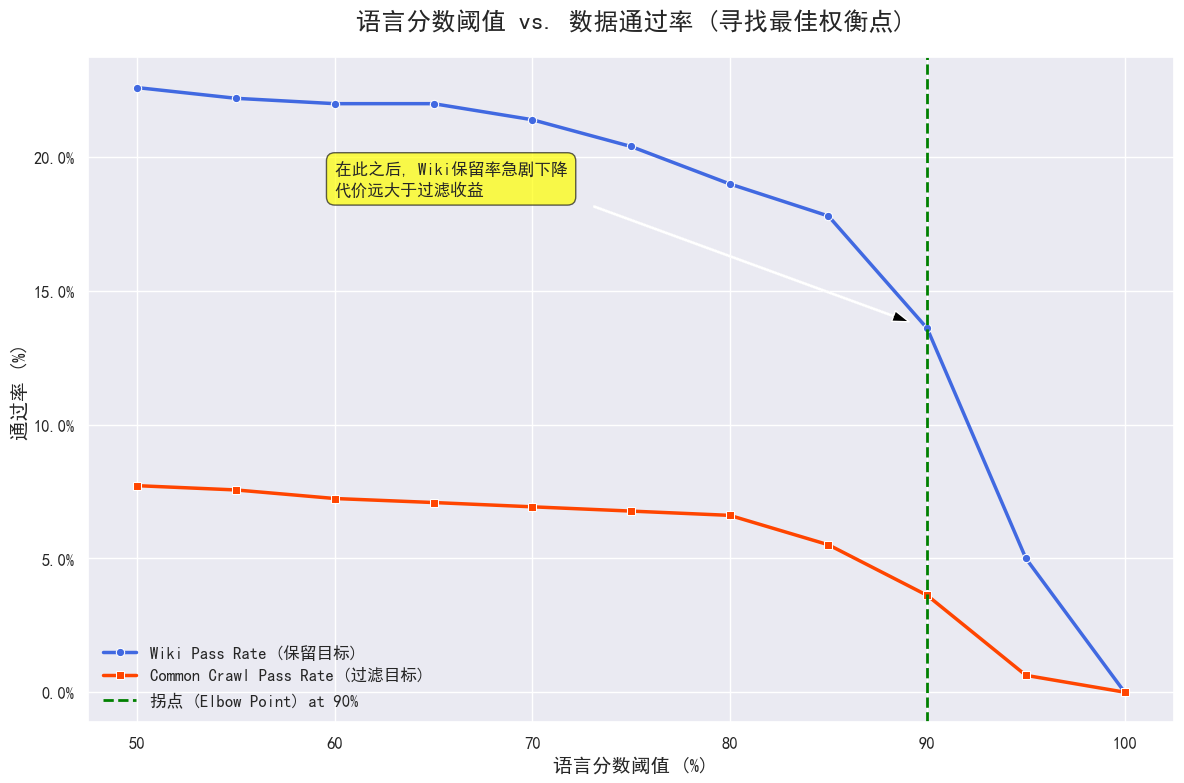

In [14]:
# 1. 手动整理你的实验数据
# 这是最关键的一步，我们把你图片中的数据转化成机器可读的格式
analysis_data = [
    {'threshold': 50, 'common_crawl': 7.72, 'wiki': 22.60},
    {'threshold': 55, 'common_crawl': 7.56, 'wiki': 22.20},
    {'threshold': 60, 'common_crawl': 7.24, 'wiki': 22.00},
    {'threshold': 65, 'common_crawl': 7.09, 'wiki': 22.00},
    {'threshold': 70, 'common_crawl': 6.93, 'wiki': 21.40},
    {'threshold': 75, 'common_crawl': 6.77, 'wiki': 20.40},
    {'threshold': 80, 'common_crawl': 6.61, 'wiki': 19.00}, # 你的80%数据和我之前看到的不一样，以此处为准
    {'threshold': 85, 'common_crawl': 5.51, 'wiki': 17.80},
    {'threshold': 90, 'common_crawl': 3.62, 'wiki': 13.60},
    {'threshold': 95, 'common_crawl': 0.63, 'wiki': 5.00},
    {'threshold': 100, 'common_crawl': 0.00, 'wiki': 0.00},
]

df_analysis = pd.DataFrame(analysis_data)

# 2. 绘制折线图
plt.style.use('seaborn-v0_8-whitegrid') # 使用一个漂亮的主题

plt.rcParams['font.sans-serif'] = ['SimHei']
sns.set_theme(font='SimHei')
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(12, 8)) # 创建图表和坐标轴

# 绘制 Wiki 通过率曲线
sns.lineplot(data=df_analysis, x='threshold', y='wiki', marker='o', label='Wiki Pass Rate (保留目标)', color='royalblue', linewidth=2.5)

# 绘制 Common Crawl 通过率曲线
sns.lineplot(data=df_analysis, x='threshold', y='common_crawl', marker='s', label='Common Crawl Pass Rate (过滤目标)', color='orangered', linewidth=2.5)

# 3. 标注和美化
ax.set_title('语言分数阈值 vs. 数据通过率 (寻找最佳权衡点)', fontsize=18, pad=20)
ax.set_xlabel('语言分数阈值 (%)', fontsize=14)
ax.set_ylabel('通过率 (%)', fontsize=14)

# 格式化Y轴为百分比
ax.yaxis.set_major_formatter(mticker.PercentFormatter())
ax.tick_params(axis='both', which='major', labelsize=12)

# --- 关键：高亮“拐点” ---
elbow_point_x = 90
ax.axvline(x=elbow_point_x, color='green', linestyle='--', linewidth=2, label=f'拐点 (Elbow Point) at {elbow_point_x}%')

# 添加解释性文字
ax.annotate(
    '在此之后, Wiki保留率急剧下降\n代价远大于过滤收益',
    xy=(elbow_point_x, df_analysis.query("threshold == 90")['wiki'].iloc[0]), # 箭头指向的点
    xytext=(elbow_point_x - 30, df_analysis.query("threshold == 90")['wiki'].iloc[0] + 5), # 文字的位置
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", fc="yellow", ec="k", lw=1, alpha=0.7)
)

ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

